In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")  # file path may vary
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 9)


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [5]:
print("\nDataset Info:")
print(df.info())
df.drop_duplicates(inplace=True)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [6]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,NaN,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,2023-07-03 00:25:55.200000256,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,NaN,NaN,64.00000,NaN,4.000000,500.000000,2000.000000


In [8]:
# Mean, Median, Mode of Total Amount
print("Mean Sales:", df['Total Amount'].mean())
print("Median Sales:", df['Total Amount'].median())
print("Mode Sales:", df['Total Amount'].mode()[0])

# Standard Deviation
print("Std Dev of Sales:", df['Total Amount'].std())

Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Std Dev of Sales: 559.997631555123


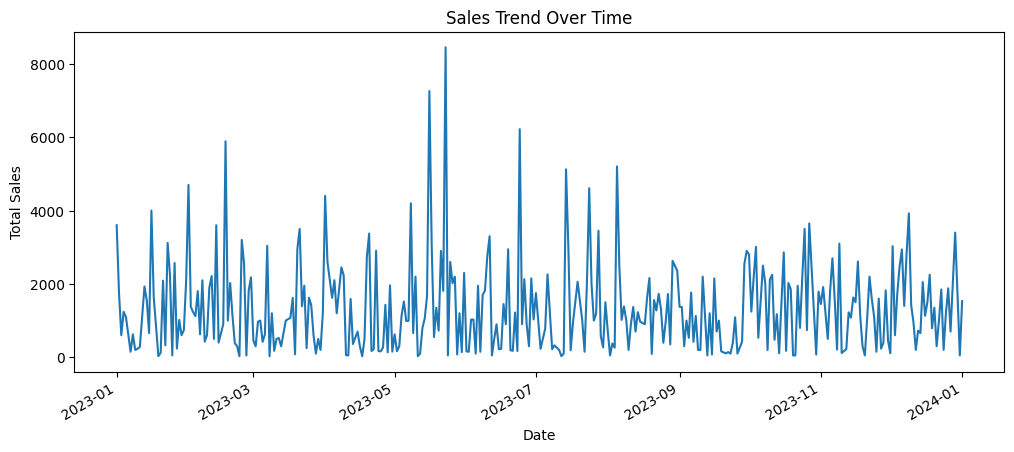

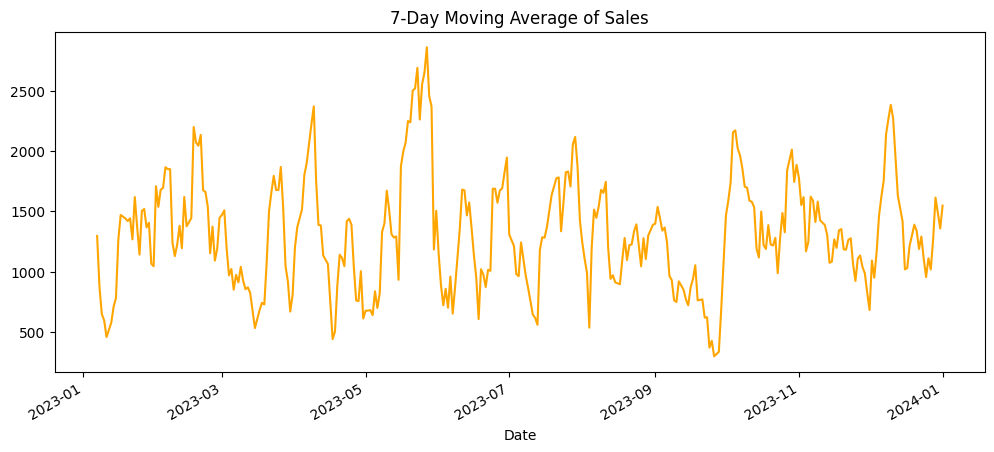

In [9]:
# Group by Date to see sales trend
if 'Date' in df.columns:
    sales_trend = df.groupby('Date')['Total Amount'].sum()

    plt.figure(figsize=(12,5))
    sales_trend.plot()
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()

    # Rolling average (7-day)
    sales_trend.rolling(7).mean().plot(figsize=(12,5), color='orange')
    plt.title("7-Day Moving Average of Sales")
    plt.show()

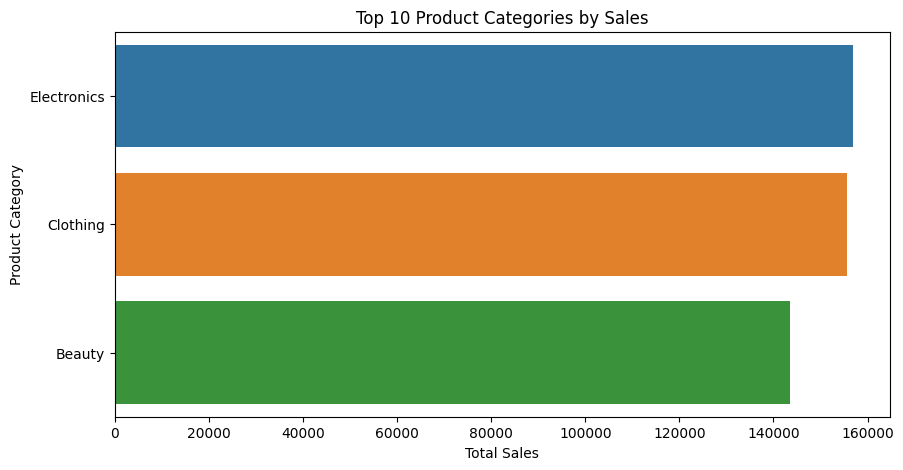

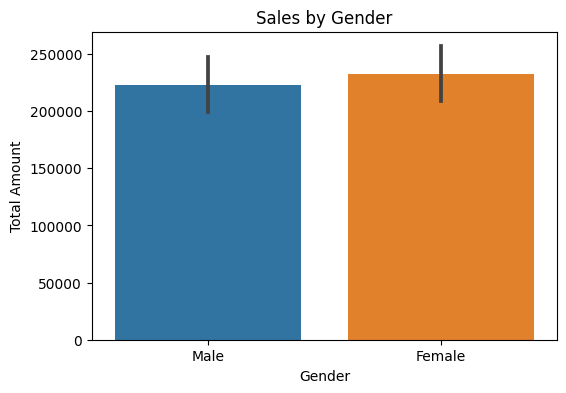

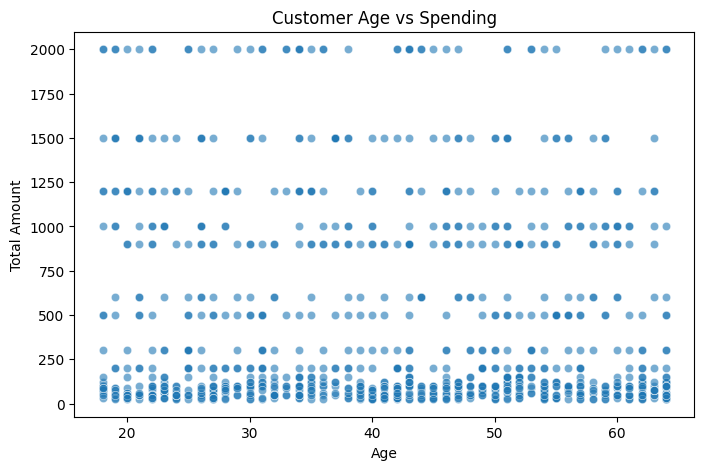

In [10]:
# Top 10 products by sales
if 'Product Category' in df.columns:
    top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.values, y=top_products.index)
    plt.title("Top 10 Product Categories by Sales")
    plt.xlabel("Total Sales")
    plt.show()

# Sales by Gender (if available)
if 'Gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum)
    plt.title("Sales by Gender")
    plt.show()

# Age vs Spending
if 'Age' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='Age', y='Total Amount', data=df, alpha=0.6)
    plt.title("Customer Age vs Spending")
    plt.show()

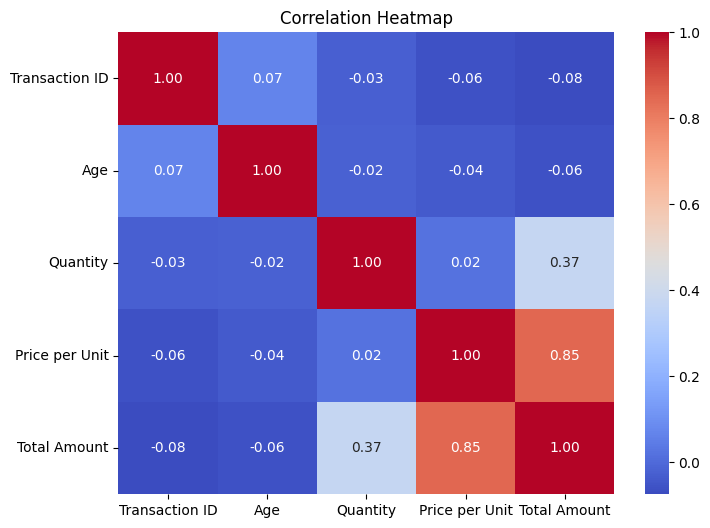

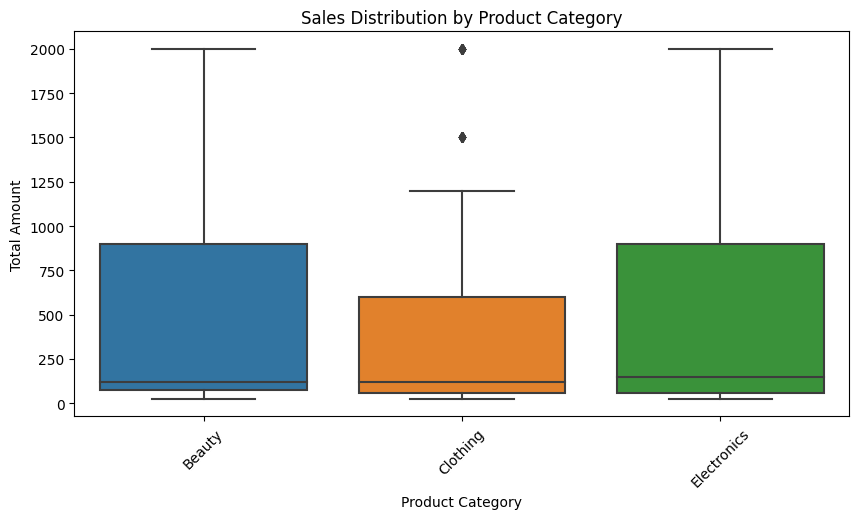

In [11]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot of Sales per Category
if 'Product Category' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Product Category', y='Total Amount', data=df)
    plt.xticks(rotation=45)
    plt.title("Sales Distribution by Product Category")
    plt.show()